# ДЗ 6

## Опис домашнього завдання

Ти замовив/-ла виконання дослідження ефективності роботи співробітників і отримав/-ла наближену залежність ефективності роботи (кількість тасків за одиницю часу) від часу доби, за умови, що завдання однакові за складністю.

$ 2\left(\frac4{1.2\sqrt{2\mathrm\pi}}e^{-\frac12\left(\frac{x-11}{1.2}\right)^2}+\frac7{2.4\sqrt{2\mathrm\pi}}e^{-\frac12\left(\frac{x-15}{2.4}\right)^2}\right) $

> Примітка*. Форма функції наближено відповідає реальним спостереженням, але функція була спрощена для легшого опрацювання.

Позначимо початок і кінець робочого дня як a=9 та b=18 відповідно.

Тобі буде потрібно порахувати середню кількість тасків, виконаних упродовж робочого дня (в робочі години з 9 до 18).

### Завдання 1
Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Різниця значень первісної F(b) - F(a) = 20.051645014188303


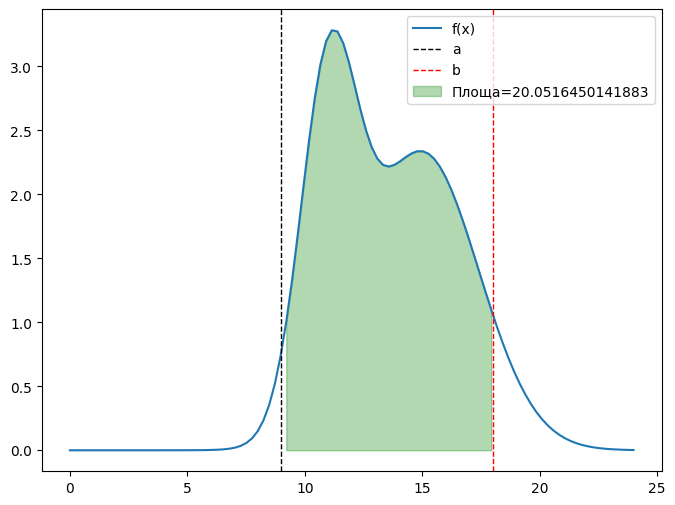

In [1]:
import numpy as np
import sympy as sp
from sympy import sqrt, pi, exp, erf
from IPython.display import display, Math
import matplotlib.pyplot as plt

# Границі інтегрування
a, b = 9, 18  # integral limits

# Задаємо символьну змінну x
x = sp.symbols("x")

# Визначаємо функцію
fx = 2 * (
    (4 / (1.2 * sqrt(2 * pi))) * exp(-0.5 * ((x - 11) / 1.2) ** 2)
    + (7 / (2.4 * sqrt(2 * pi))) * exp(-0.5 * ((x - 15) / 2.4) ** 2)
)

# Знаходимо первісну функції
Fx = sp.integrate(fx, x)

# Знаходимо визначений інтеграл в межіх a, b
integral = sp.integrate(fx,(x,a,b))
integral_num=round(sp.N(integral),18)
# Виводимо результати
display(Math("Функція\ f(x)=" + sp.latex(fx)))
display(Math("Первісна\ F(x)=" + sp.latex(Fx)))
display(Math(f"Інтеграл\ \int_{{{a}}}^{{{b}}} f(x) \, dx = {integral_num}"))


# Перетворюємо функції у функції для чисельних обчислень
f_calc = sp.lambdify(x, fx, "numpy")
Fx_calc = sp.lambdify(x, Fx, "numpy")

# Задаємо значення для x
x_vals = np.linspace(0, 24, 100)
x_F_vals = np.linspace(a, b, 100)

# Векторизуємо функції
f_vectorized = np.vectorize(f_calc)
Fx_vectorized = np.vectorize(Fx_calc)

# Різниця значення первісної в точках b, a
print(f"Різниця значень первісної F(b) - F(a) = {Fx_calc(b)-Fx_calc(a)}")


# Обраховуємо відповідні значення y
fx_vals = f_vectorized(x_vals)
Fx_vals = Fx_vectorized(x_F_vals)

# Будуємо графіки
plt.figure(figsize=(8, 6))
# графік функції
plt.plot(x_vals, fx_vals, label=r"f(x)")
# графік первісної
# plt.plot(x_F_vals, Fx_vals, label="F(x)")

# Додавання вертикальних прямих
plt.axvline(
    a,
    color="black",
    linestyle="--",
    linewidth=1,
    label="a",
)
plt.axvline(
    b,
    color="r",
    linestyle="--",
    linewidth=1,
    label="b",
)

# Заштриховуємо площу
plt.fill_between(
    x_vals,
    fx_vals,
    alpha=0.3,
    where=(x_vals >= a) & (x_vals <= b),
    color="g",
    label=f"Площа={integral_num}",
)

# Додаємо легенду
plt.legend()

# Показуємо графік
plt.show()

### Завдання 2
Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.

In [2]:
def rectangle_method(f, a, b, n) -> float:
    """
    Функція чисельного інтегрування методом прямокутників.

    Парамметри:
        f (function): Функція.
        a (float): Нижня межа інтегрування.
        b (float): Верхня межа інтегрування.
        n (int): К-ть прямокутників для наближення.

    Результат:
        float: Наближене значення визначеного інтеграла.
    """
    h = (b - a) / n  # Ширина кожного прямокутника
    # print(f"{h = }")

    # масив x для обрахунку
    x_array = np.linspace(a, b, n + 1)
    # print(f"{x_array = }")
    # print(f"{len(x_array) = }")

    # змістимо масив на h/2 щоб визначити y посередині відрізків
    x_array += h / 2
    # print(f"{x_array = }")
    # print(f"{len(x_array) = }")

    integral_rectangle = h * sum(f(xi) for xi in x_array if a <= xi <= b)
    return integral_rectangle


# Використовуємо метод прямокутників для обчислення інтегралу
# integral_rectangle = rectangle_method(lambda x: f_calc(x), a, b, 100)
integral_rectangle = rectangle_method(f_calc, a, b, 100)

display(
    Math(rf"Метод\ прямокутників\ \int_{{{a}}}^{{{b}}} f(x) \, dx \approx {integral_rectangle}")
)

<IPython.core.display.Math object>

### Завдання 3
Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.
<hr>

Формула трапецій має вигляд:  
$ \displaystyle\int_{a}^b f(x)dx \approx h\left(\cfrac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1}f(x_i) \right). $

In [3]:
def trapezoidal_method(f, a, b, n) -> float:
    """
    Функція чисельного інтегрування методом трапецій.

    Парамметри:
        f (function): Функція.
        a (float): Нижня межа інтегрування.
        b (float): Верхня межа інтегрування.
        n (int): К-ть прямокутників для наближення.

    Результат:
        float: Наближене значення визначеного інтеграла.
    """
    h = (b - a) / n  # Ширина кожн. трапеції

    integral_trapezoidal = h * (
        (f(a) + f(b)) / 2 + sum(f(a + i * h) for i in range(1, n))
    )
    return integral_trapezoidal


# обчислення інтегралу
integral_trapezoidal = trapezoidal_method(f_calc, a, b, 100)

display(
    Math(rf"Метод\ трапецій\ \int_{{{a}}}^{{{b}}} f(x) \, dx \approx {integral_trapezoidal}")
)

<IPython.core.display.Math object>

### Завдання 4
Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.
<hr>
Формула Сімпсона є ще одним методом чисельного інтегрування для наближеного обчислення визначених інтегралів.



Для відомого вигляду формули Сімпсона розглянемо ситуацію, де маємо парну кількість поділів на відрізки, тобто $n=2m$.



Формула Сімпсона виглядає таким чином:  
$ \displaystyle \int_{a}^{b} f(x) \,dx \approx \frac{h}{3} [f(x_0) + f(x_{2m}) + 4\left(f(x_1)+f(x_3)+\ldots+f(x_{2m-1})\right) + 2\left(f(x_2)+f(x_4)+\ldots+f(x_{2m-2})\right)]. $

In [4]:
def simpson_method(f, a, b, n) -> float:
    """
    Функція чисельного інтегрування методом Сімпсона.

    Парамметри:
        f (function): Функція.
        a (float): Нижня межа інтегрування.
        b (float): Верхня межа інтегрування.
        n (int): К-ть підінтервалів для використання в апроксимації (має бути парною).

    Результат:
        float: Наближене значення визначеного інтеграла.
    """
    if n % 2 != 0:
        raise ValueError(
            "К-ть підінтервалів для використання в апроксимації має бути парною"
        )

    h = (b - a) / n  # Ширина кожного інтервалу
    x_vals = np.linspace(a, b, n + 1)
    y_vals = f(x_vals)

    integral_simpson = (h / 3) * (
        y_vals[0] + y_vals[-1] + 4 * sum(y_vals[1:-1:2]) + 2 * sum(y_vals[2:-2:2])
    )
    return integral_simpson


# обчислення інтегралу
integral_simpson = simpson_method(f_calc, a, b, 100)

display(Math(rf"Метод\ Сімпсона\ \int_{{{a}}}^{{{b}}} f(x) \, dx \approx {integral_simpson}"))

<IPython.core.display.Math object>

### Завдання 5
Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.

In [5]:
import scipy.integrate as spi

integral_scipi, abserr = spi.quad(f_calc, a, b)
display(Math(rf"scipy.integrate.quad\ \int_{{{a}}}^{{{b}}} f(x) \, dx \approx {integral_scipi}"))

<IPython.core.display.Math object>

In [6]:
print(f"Різниця значень первісної F(b) - F(a) = {Fx_calc(b)-Fx_calc(a)}")
display(Math(rf"Метод\ прямокутників\ \int_{{{a}}}^{{{b}}} f(x) \, dx \approx {integral_rectangle}") )
display(Math(rf"Метод\ трапецій\ \int_{{{a}}}^{{{b}}} f(x) \, dx \approx {integral_trapezoidal}") )
display(Math(rf"Метод\ Сімпсона\ \int_{{{a}}}^{{{b}}} f(x) \, dx \approx {integral_simpson}"))
display(Math(rf"scipy.integrate.quad\ \int_{{{a}}}^{{{b}}} f(x) \, dx \approx {integral_scipi}"))
display(Math(f"Інтеграл\ sympy.integrate\ \int_{{{a}}}^{{{b}}} f(x) \, dx = {integral_num}"))

Різниця значень первісної F(b) - F(a) = 20.051645014188303


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>